In [75]:
from tensorflow.lite.python.interpreter import Interpreter

print("TensorFlow Lite version: ", Interpreter)

TensorFlow Lite version:  <class 'tensorflow.lite.python.interpreter.Interpreter'>


In [76]:
from tensorflow.lite.python.interpreter import Interpreter
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [77]:
data_folder = "D:/IDP/TFOD/Tensorflow/workspace/aug_images/test/"
data_folder = os.path.abspath(data_folder)

model_path = "detect.tflite"
label_path = "labels.txt"

interpreter = Interpreter(model_path=model_path)
print(data_folder)

D:\IDP\TFOD\Tensorflow\workspace\aug_images\test


In [78]:
interpreter.allocate_tensors()

In [79]:
print("Details about the input tensors:\n ", interpreter.get_input_details())
print("There exist {num} input tensors.".format(num=len(interpreter.get_input_details())))
print("   Type: ", type(interpreter.get_input_details()), end="\n\n")

print("Details about the first input tensor:\n ", interpreter.get_input_details()[0])
print("   Type: ", type(interpreter.get_input_details()[0]), end="\n\n")

print("Shape of the first input tensor:\n ", interpreter.get_input_details()[0]['shape'])
print("   Type: ", type(interpreter.get_input_details()[0]['shape']), end="\n\n")

_, height, width, _ = interpreter.get_input_details()[0]['shape']
print("Image Width: {}\nImage Height: {}".format(width, height))

Details about the input tensors:
  [{'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
There exist 1 input tensors.
   Type:  <class 'list'>

Details about the first input tensor:
  {'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
   Type:  <class 'dict'>

Shape of the first input tensor:
  [  1 320 320   3]
   Type:  <class 'numpy.ndarray'>



In [103]:
print("Details about the output tensors:\n ", interpreter.get_output_details())
print("There exist {num} output tensors.".format(num=len(interpreter.get_output_details())))
print("   Type: ", type(interpreter.get_output_details()), end="\n\n")
print("Details about the first output tensor:\n ", interpreter.get_output_details()[0])
print("   Type: ", type(interpreter.get_output_details()[0]), end="\n\n")
print("Shape of the first output tensor:\n ", interpreter.get_output_details()[0]['shape'])
print("   Type: ", type(interpreter.get_output_details()[0]['shape']), end="\n\n")
print("Details about the second output tensor:\n ", interpreter.get_output_details()[1])
print("   Type: ", type(interpreter.get_output_details()[1]), end="\n\n")
print("Shape of the second output tensor:\n ", interpreter.get_output_details()[1]['shape'])
print("   Type: ", type(interpreter.get_output_details()[1]['shape']), end="\n\n")
print("Details about the third output tensor:\n ", interpreter.get_output_details()[2])

print("   Type: ", type(interpreter.get_output_details()[2]), end="\n\n")
print("Shape of the third output tensor:\n ", interpreter.get_output_details()[2]['shape'])
print("   Type: ", type(interpreter.get_output_details()[2]['shape']), end="\n\n")
print("Details about the fourth output tensor:\n ", interpreter.get_output_details()[3])
print("   Type: ", type(interpreter.get_output_details()[3]), end="\n\n")
print("Shape of the fourth output tensor:\n ", interpreter.get_output_details()[3]['shape'])
print("   Type: ", type(interpreter.get_output_details()[3]['shape']), end="\n\n")


Details about the output tensors:
  [{'name': 'StatefulPartitionedCall:1', 'index': 339, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([ 1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:3', 'index': 337, 'shape': array([ 1, 10,  4], dtype=int32), 'shape_signature': array([ 1, 10,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:0', 'index': 340, 'shape': array([1], dtype=int32), 'shape_signature': array([1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], d

In [80]:
image = Image.open(os.path.join(data_folder, "lowerlevel_500724df-bdcf-11ef-8c46-08bfb8094c99_aug2.jpg")).convert("RGB")
print("Original Image Size: ", image.size)

image = image.resize((width, height))
print("Resized Image Size: ", image.size)

Original Image Size:  (640, 480)
Resized Image Size:  (320, 320)


In [81]:
def set_input_tensor(interpreter, image):

    # interpreter.allocate_tensors()
    
    tensor_index = interpreter.get_input_details()[0]['index']
    print("Index of the input tensor: ", tensor_index, end="\n\n")

    input_tensor = interpreter.tensor(tensor_index)()[0]

    plt.subplot(1, 2, 1)
    plt.subplot(121)
    plt.imshow(input_tensor)
    plt.title("Before")

    input_tensor[:, :] = image

    plt.subplot(122)
    plt.imshow(input_tensor)
    plt.title("After")
    plt.show()

In [83]:
def set_input_tensor(interpreter, image):
    """Sets the input tensor and visualizes before/after assignment."""

    # Get input tensor index
    tensor_index = interpreter.get_input_details()[0]['index']
    print("Index of the input tensor:", tensor_index, end="\n\n")

    input_tensor = interpreter.tensor(tensor_index)()[0]

    # Convert image to NumPy array if it's a PIL image
    if not isinstance(image, np.ndarray):
        image = np.array(image)

    # Normalize the image to [0,1] if model expects float32
    if input_tensor.dtype == np.float32:
        image = image.astype(np.float32) / 255.0  # Normalize

    # Ensure image shape matches input tensor shape
    if image.shape != input_tensor.shape:
        raise ValueError(f"Shape mismatch: Expected {input_tensor.shape}, but got {image.shape}")

    # Plot Before Assignment
    plt.figure(figsize=(8, 4))

    plt.subplot(121)
    plt.imshow(input_tensor.squeeze(), cmap='gray' if input_tensor.shape[-1] == 1 else None)
    plt.title("Before")

    # Assign image to the input tensor
    input_tensor[:, :] = image

    # Plot After Assignment
    plt.subplot(122)
    plt.imshow(input_tensor.squeeze(), cmap='gray' if input_tensor.shape[-1] == 1 else None)
    plt.title("After")

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [23.0..234.0].


Index of the input tensor: 0



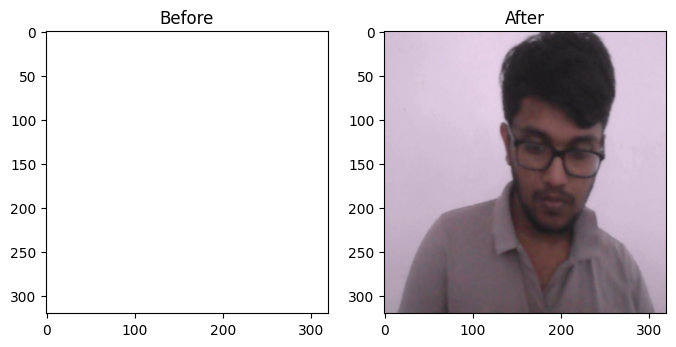

In [84]:
set_input_tensor(interpreter, image)

In [100]:
image = Image.open(os.path.join(data_folder, "upperlevel_105707b7-bdcf-11ef-a5a2-08bfb8094c99_aug3.jpg")).convert("RGB")
print("Original Image Size: ", image.size)

image = image.resize((width, height))
print("Resized Image Size: ", image.size)

Original Image Size:  (640, 480)
Resized Image Size:  (320, 320)


In [101]:
import numpy as np

def set_input_tensor(interpreter, image):
    """Sets the input tensor with the provided image."""
    
    input_details = interpreter.get_input_details()[0]
    tensor_index = input_details['index']
    
    # Convert image to NumPy array if needed
    if not isinstance(image, np.ndarray):
        image = np.array(image)

    # Ensure correct data type and normalization if required
    if input_details['dtype'] == np.float32:
        image = image.astype(np.float32) / 255.0  # Normalize to [0,1]

    # Ensure shape matches the model input
    input_shape = input_details['shape']
    if image.shape != tuple(input_shape[1:]):  # Exclude batch dimension
        raise ValueError(f"Shape mismatch: Expected {input_shape[1:]}, but got {image.shape}")

    # Allocate tensors and set the input tensor
    interpreter.allocate_tensors()
    interpreter.set_tensor(tensor_index, np.expand_dims(image, axis=0))  # Add batch dimension

def classify(interpreter):
    """Runs inference and returns the predicted label and probability."""
    
    interpreter.invoke()
    
    output_details = interpreter.get_output_details()[0]
    scores = interpreter.get_tensor(output_details['index'])

    # Dequantization if necessary
    scale, zero_point = output_details['quantization']
    scores_dequantized = scale * (scores - zero_point) if scale != 0 else scores

    # Get the highest probability class
    max_score_index = np.argmax(scores_dequantized)
    max_score = scores_dequantized[0][max_score_index]

    print(f"Predicted class index: {max_score_index}, Probability: {max_score}")

    return max_score_index, max_score


In [102]:
label_id, prob = classify(interpreter)

Predicted class index: 0, Probability: 0.4765481948852539
